# Classifying Wines

<!-- PELICAN_BEGIN_SUMMARY -->
Let's kick off the blog with learning about wines, or rather training classifiers to learn wines for us ;)

In this post, we'll take a look at the [UCI Wine data](https://archive.ics.uci.edu/ml/datasets/wine), and then train several scikit-learn classifiers to predict wine classes.

<!-- PELICAN_END_SUMMARY -->
On a recent 5-hour wifi-less bus trip I learned that scikit-learn comes prepackaged with some interesting [datasets](http://scikit-learn.org/stable/datasets/index.html). Among them are several 'toy datasets' which don't require an internet connection, so I decided that this would be a perfect time to experiment with building classifiers! As a result of not having internet, this post will track how I went about working with a dataset where I didn't initially have any idea how it would be structured or formatted.

We'll focus on a small wine database which carries a categorical label for each wine along with several continuous-valued features. There are three different wine 'categories' and our goal will be to classify an unlabeled wine according to its characteristic features such as alcohol content, flavor, hue etc. 

## Load and Organize Data

First let's import the usual data science modules!

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Now from the skearn datasets let's load the 'wine' dataset and see whats all in there.

In [2]:
raw_data = datasets.load_wine()
raw_data

{'DESCR': 'Wine Data Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- 1) Alcohol\n \t\t- 2) Malic acid\n \t\t- 3) Ash\n\t\t- 4) Alcalinity of ash  \n \t\t- 5) Magnesium\n\t\t- 6) Total phenols\n \t\t- 7) Flavanoids\n \t\t- 8) Nonflavanoid phenols\n \t\t- 9) Proanthocyanins\n\t\t- 10)Color intensity\n \t\t- 11)Hue\n \t\t- 12)OD280/OD315 of diluted wines\n \t\t- 13)Proline\n        \t- class:\n                - class_0\n                - class_1\n                - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80   

It's a dictionary with some extra info besides the actual data. And one of the keys is `'DESCR'`, so let's start by taking a look at that. By `print`ing it, we can see the formatted text... 

In [3]:
print(raw_data['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

Excellent! This is just what we needed to understand how to think about and use this data set. The key points:
1. there are 3 classes (creatively named `'class_0'`, `'class_1'`, and `'class_2'`). It's likely these correspond to some typical wine varietals like Pinot Noir, or Cabernet, or Merlot...
2. there are 13 numerical attributes detailing things like alcohol perentage, ash (am I drinking ash in my wine??), Flavanoids, etc. 

Since this is a dictionary, let's also print out the other key/value pairs so we can decide how we'll format a data structure useful for our needs. The `dict.items()` method allows easy access to the key/values in a for loop. 

In [4]:
for key,value in raw_data.items():
    print(key,'\n',value,'\n')

target_names 
 ['class_0' 'class_1' 'class_2'] 

feature_names 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1

Everything looks good. We are most interested in the `'data'` and `'target'` fields. Let's quickly check their shapes. 

In [5]:
print('data.shape\t',raw_data['data'].shape,
      '\ntarget.shape \t',raw_data['target'].shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


That looks good, we've confirmed that we have 178 samples (rows) and 13 features (columns). Now let's build a pandas DataFrame to hold our data so that we can make use of all of its snazzy features. Then we'll take a look at the first few entries.

In [6]:
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


We can also get some summary statistics now that we have a DataFrame. 

In [7]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


What is the distrbution of alcohol content among all of the wines?

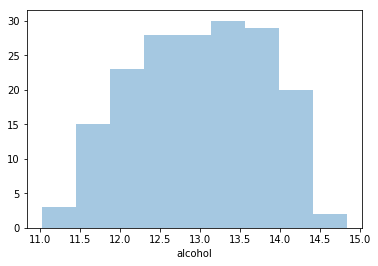

In [8]:
sns.distplot(data['alcohol'],kde=0)

What is the distribution of alcohol content by class?

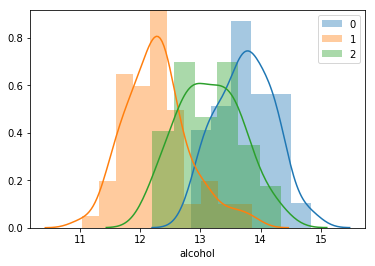

In [9]:
for i in data.target.unique():
    sns.distplot(data['alcohol'][data.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

Interestingly, the three classes seem to naturally separate as  low/mid/high alcohol distrubtions. What are the distributions of the classes for the rest of the features? 
We'll use Seaborn's `.kdeplot()` method so we can cleanly distinguish each class. However, note that this scales the y-axis so that the integral under each curve is 1. 

alcohol


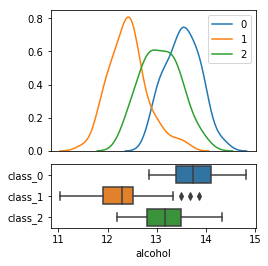

malic_acid


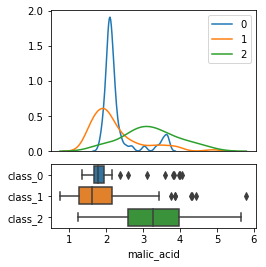

ash


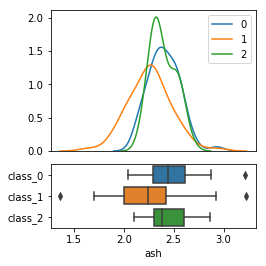

alcalinity_of_ash


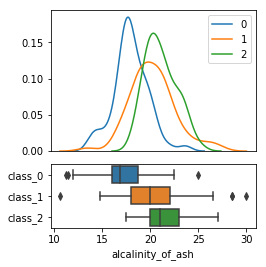

magnesium


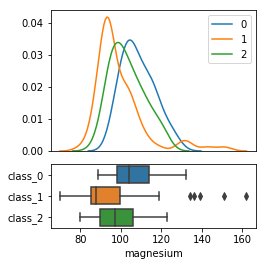

total_phenols


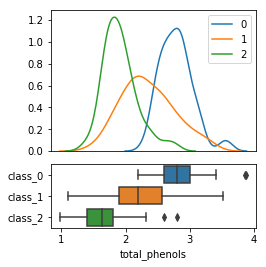

flavanoids


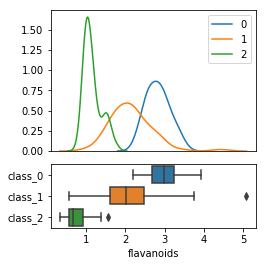

nonflavanoid_phenols


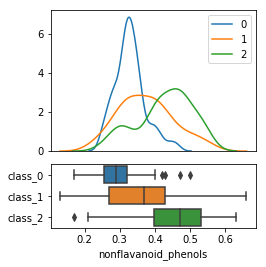

proanthocyanins


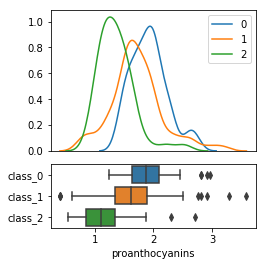

color_intensity


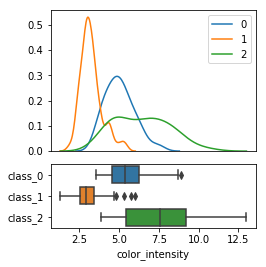

hue


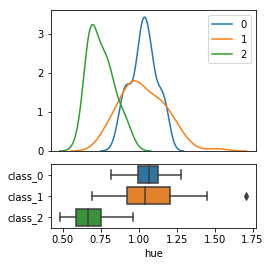

od280/od315_of_diluted_wines


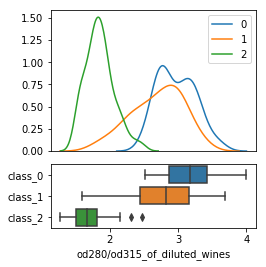

proline


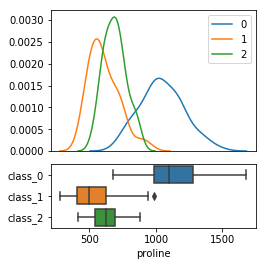

In [10]:
import matplotlib.gridspec as gridspec
for feature in raw_data['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

For some of the features such as flavanoids and total phenols, it is clear the class distributions have quite different means. Thus we could expect that even simple models may be able to distinguish the wines...

## Split data

In order to effectively train and test our model, we need to separate the data into a training set which we will feed to our model along the the training labels. Then after we have trained the model, we will test it on the 'test' data, so that we can gauge the real-world applicability of the model.

Scikit-learn has a useful functionality here with the `train_test_split()` method. `test_size` governs the proportion of data that is reserved for testing. We want to train on enough data that our model can make good predictions but we also need enough test data to determine if we've overfit the model. We'll use 20% of the data for testing.

In [13]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = \
    train_test_split(raw_data['data'],raw_data['target'],
                     test_size=0.2)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



Often the features will require some preprocessing. Scikit-learn makes this easy to do with the Pipeline module. Here, however, we are just going to use the features as they are provided. We'll just specify which classifier we want which is Gaussian Naive Bayes. GaussianNB treats models each feature as a gaussian within each class, which, as we saw above, may be an adequate representation of the data. The one drawback of GaussianNB is that is treats each feature independently (hence 'naive' bayes) so that coupling between features is ignored. 

## Model selection/validation

There are many classifcation algorithms to choose through, so let's throw them all at our problem and pick the one that performs best. To do that we'll create a dict of all of the scikit-learn classifiers. 

Some classifiers depend on one or more hyperparemeters or regularizatin techniques whose optimal values are not known ahead of time. In order to find the optimal parameters, we can just take a brute force approach where we test all of them, and keep model that has the highest cross-validation score. Below, we'll perform [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the optimal hyperparameters included in the dict below.

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Linear SVM": 
            {'classifier': SVC(),
                 'params': [
                            {
                             'C': [1, 10, 100, 1000],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear']
                            }
                           ]
            },
    "Gradient Boosting Classifier": 
            {'classifier': GradientBoostingClassifier(),
                 'params': [
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,None]
                            }
                           ]
            },
    "Decision Tree":
            {'classifier': tree.DecisionTreeClassifier(),
                 'params': [
                            {
                             'max_depth':[3,None]
                            }
                             ]
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(),
                 'params': {}
            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            }
}

When fitting classifiers it is useful to get a sense of their predictive power as a function of the number of training samples. This is visualized as a 'learning curve.' Below is a method from the [scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py) that plots the training score (the accuracy of the model on the training data) along with the cross-validation score (which measures the accuracy on data that is left out of the training set). 

A good model should be able to capture most of the complexity of the training data (otherwise we need a model with less bias) and the validation score should increase with more training data. This behavior indicates that the model will generalize well as we collect more data. 

In [15]:
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Now comes the real training of our models. When learning how to compare classifiers I found [this blog](http://ataspinar.com/2017/05/26/classification-with-scikit-learn/) which is the basis of the 'batch_classify' method below.  For each classifier, we'll perform an exhaustive grid search where each combination of hyperparameters are cross-validated using [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) with 10 folds. This means, the data is split into 10 sets, trained on 9 of them and tested on the rest which gives the cross-validation score. The grid search then selects the combination of parameters that gives the best cv score. 

Once the optimal parameters are found, we fit each model to the full training set. Then we calculate the accuracy of predictions on the training set and the test set to see how well the model generalizes to data it has never seen. We sort the models based on their predictions on the test set--which is the true test of a classifier for 'real world' data. 

Additionally, we'll plot the learning curve as explained above. 

In [20]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 10, # 9+1
                        scoring = 'accuracy', # scoring metric
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key,
                                                    f=t_diff))
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.75,1.0),
                              cv=10)
    return df_results

trained Logistic Regression in 0.36 s
trained Random Forest in 0.18 s
trained Naive Bayes in 0.14 s
trained Decision Tree in 0.18 s
trained Gradient Boosting Classifier in 0.84 s
trained Nearest Neighbors in 0.20 s
trained Linear SVM in 0.55 s


,classifier,train_score,test_score,training_time
0,Logistic Regression,0.964789,1.000000,0.356717
1,Random Forest,1.000000,1.000000,0.175839
2,Naive Bayes,0.985915,1.000000,0.137670
4,Gradient Boosting Classifier,1.000000,1.000000,0.836090
6,Linear SVM,1.000000,0.972222,0.551079
3,Decision Tree,1.000000,0.944444,0.181586
5,Nearest Neighbors,0.774648,0.777778,0.203932


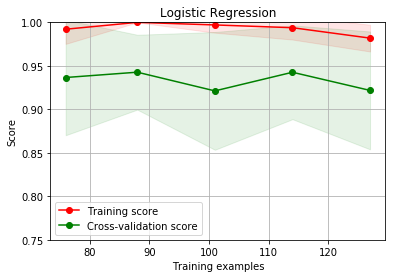

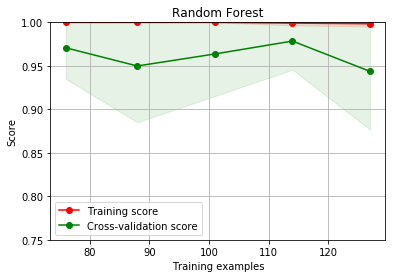

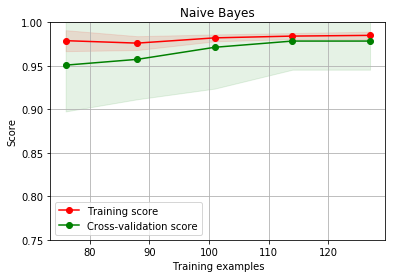

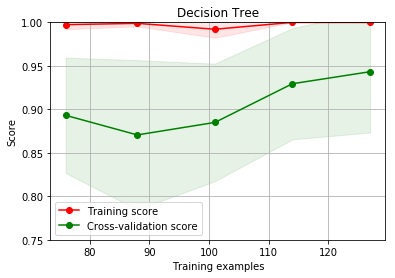

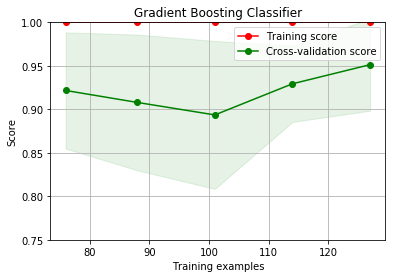

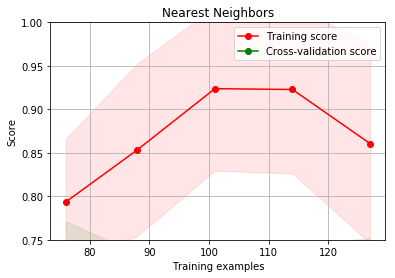

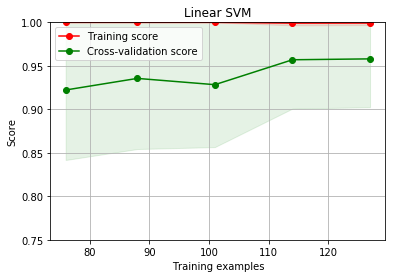

In [21]:
df_results = batch_classify(data_train, label_train, data_test, label_test)
display(df_results.sort_values(by='test_score', ascending=False))

Looks like all of the classifiers perform reasonably well except for Nearest Neighbors. Interestingly, Naive Bayes performs at almost the same level as the more complex models. 

Random Forests, LinearSVM, and Gradient Boosting classifiers almost perfectly predict the training set, meaning they have low enough bias in order to capture all of the nuance of the data. 

From the above analysis it seems like Naive Bayes, Random Forest, GradientBoosting, and LinearSVM, would all be adequate choices as 'real-world' models for wine classification that could reliably predict wine classes >95% of the time. 

## Conclusions

In this post, we analyzed the UCI Wine Dataset (which is a preloaded dataset included with scikit-learn). Pandas and Seaborn were used to organize and plot the data, which revealed that several of the features naturally separated into classes. 

Classifiers were trained and testing using the split/train/test paradigm, and we plotted the learning curves for each feature to get a sense of the stability of the models. 

Now that we've learned how to work with scikit-learn classifiers, we'll delve into exactly how they work in future posts. 

Thanks for reading!

Find this notebook and others at [https://github.com/jbechtel/data_science_notebooks](https://github.com/jbechtel/data_science_notebooks)